# Стоимость домов

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

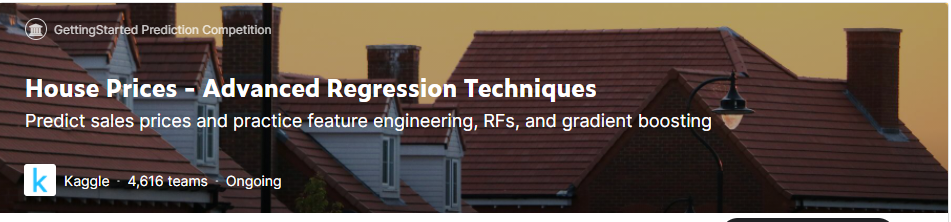

In [ ]:
!mkdir competition
%cd competition

/content/competition


In [ ]:
!gdown --id 1GJ1VLXKQaNFE_QYi7IA2SgqfT6gfun4U

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GJ1VLXKQaNFE_QYi7IA2SgqfT6gfun4U
To: /content/competition/train.csv
100% 473k/473k [00:00<00:00, 86.3MB/s]


# Разведочный анализ данных (EDA)

In [ ]:
# Импорты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

In [ ]:
df['SalePrice'].describe()

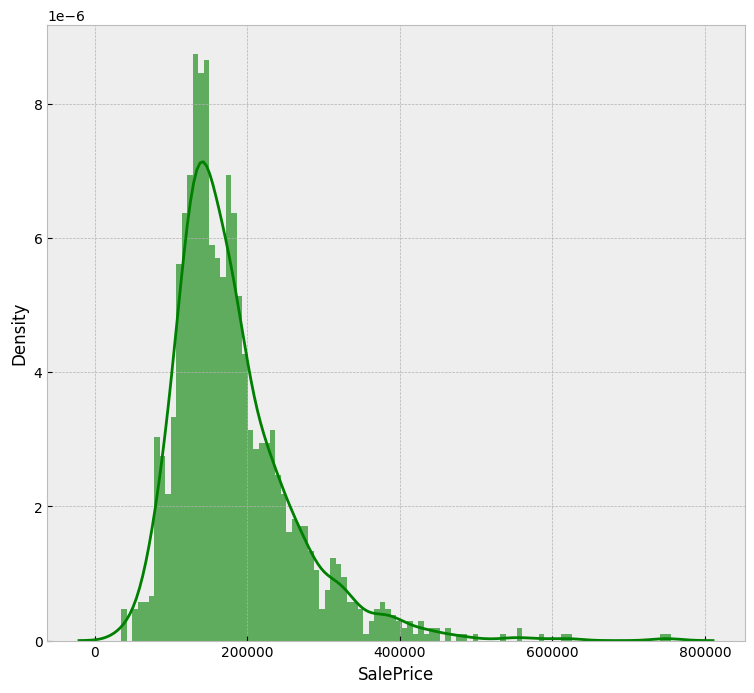

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.6});

**Коэффициент асимметрии**(skewness) — величина, характеризующая асимметрию распределения данной случайной величины.

**Коэффициент эксцесса** (kurtosis) в теории вероятностей — мера остроты пика распределения случайной величины.

In [ ]:
#skewness and kurtosis
print("Коэффициент асимметрии: %f" % df['SalePrice'].skew())
print("Коэффициент эксцесса: %f" % df['SalePrice'].kurt())

Коэффициент асимметрии: 1.882876
Коэффициент эксцесса: 6.536282


## Отношения между численными значениями

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

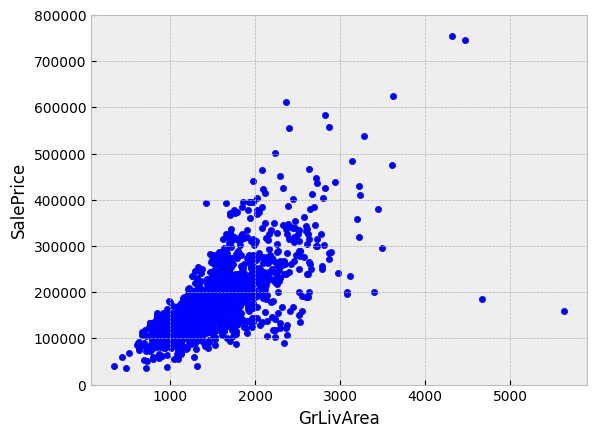

In [ ]:
#Точечный график grlivarea/saleprice
col = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

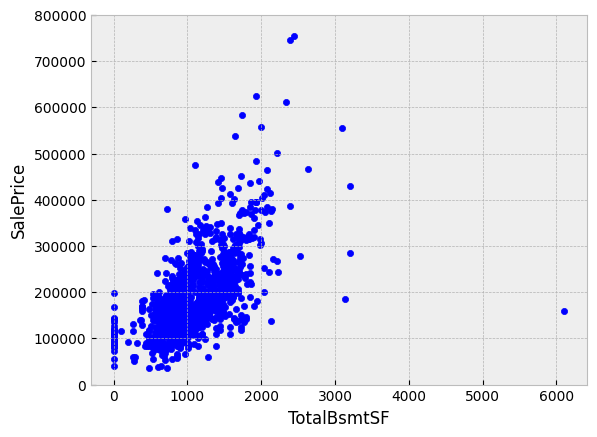

In [ ]:
#Точечный график totalbsmtsf/saleprice
col = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

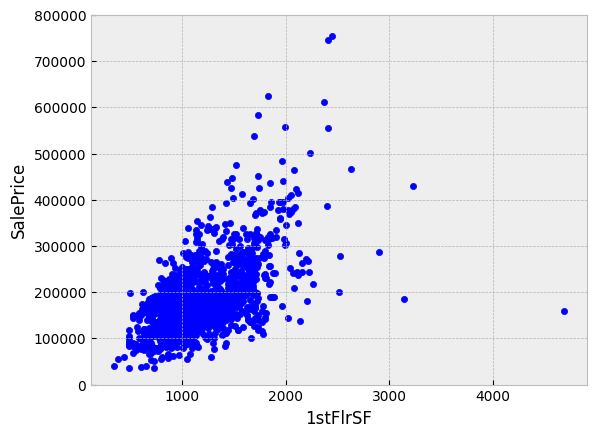

In [ ]:
col = '1stFlrSF'
data = pd.concat([df['SalePrice'], df[col]], axis=1)
data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000));

### Ящик с усами

**Ящик с усами, диаграмма размаха** (англ. box-and-whiskers diagram or plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает **медиану** (или, если нужно, **среднее**), нижний и верхний **квартили**, **минимальное** и **максимальное** значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально **сравнивать одно распределение с другим**; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

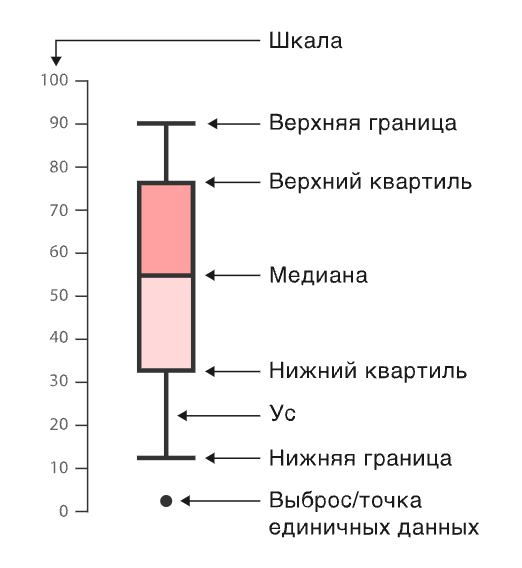

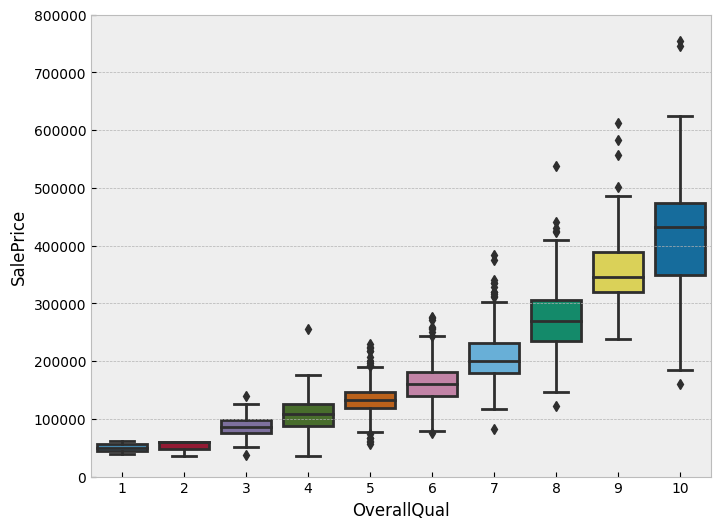

In [ ]:
#Ящик с усами overallqual/saleprice
col = 'OverallQual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=col, y="SalePrice", data=df[['SalePrice', col]])
fig.axis(ymin=0, ymax=800000);

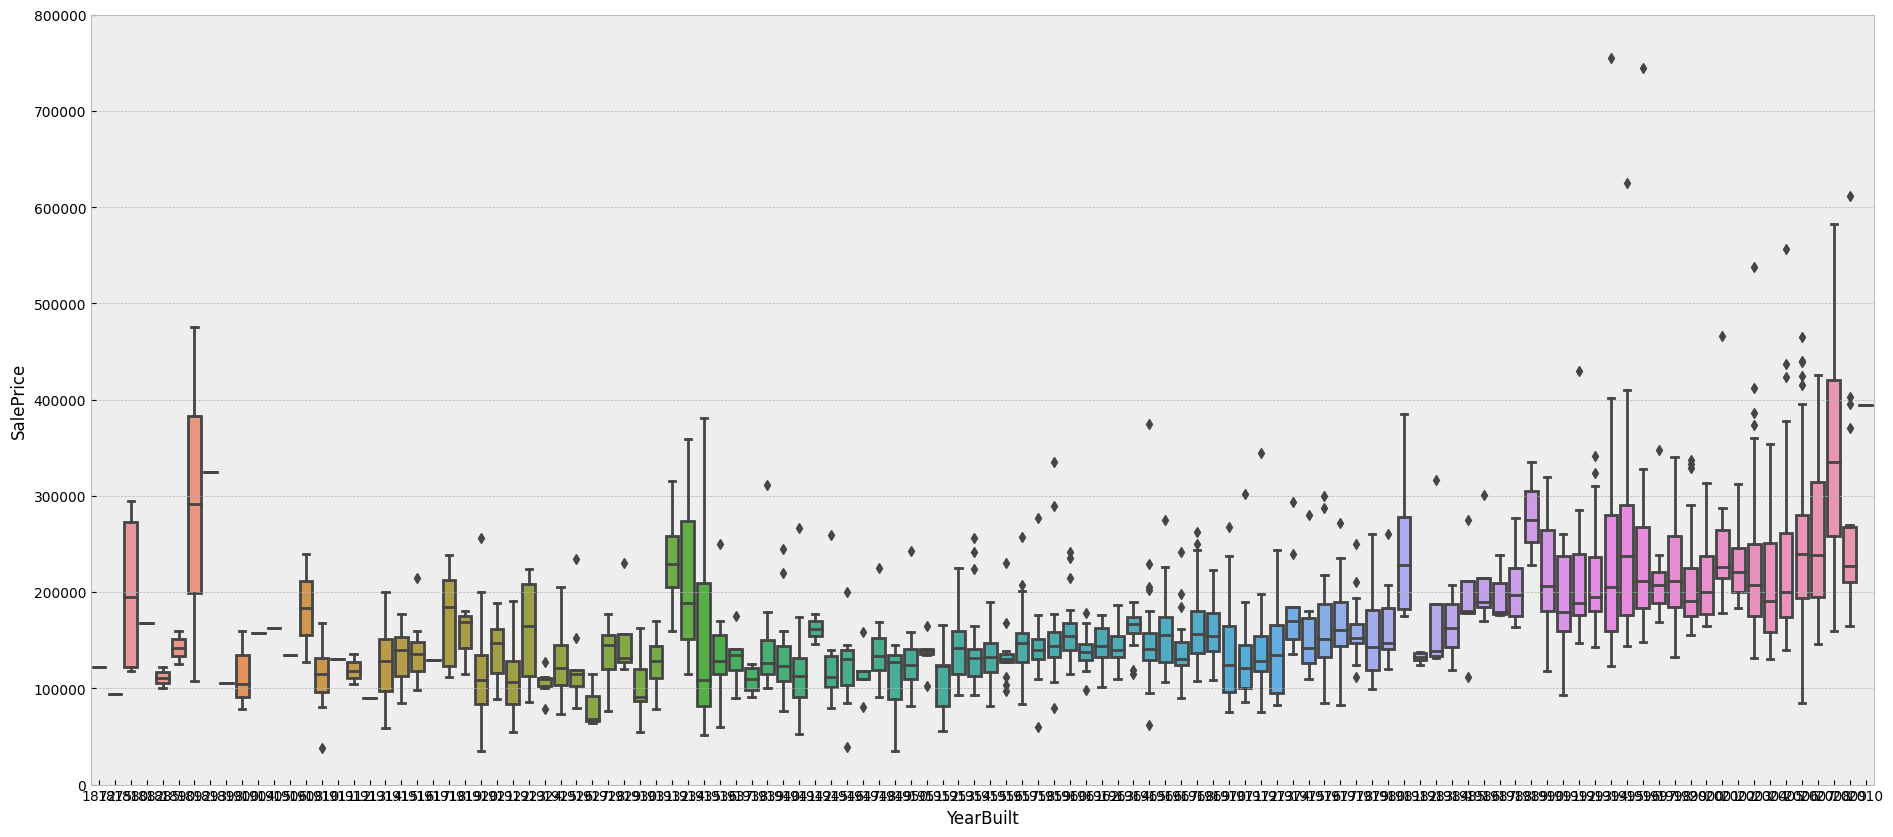

In [ ]:
col = 'YearBuilt'
f, ax = plt.subplots(figsize=(23, 10))
fig = sns.boxplot(x=col, y="SalePrice", data=df[['SalePrice', col]])
fig.axis(ymin=0, ymax=800000);

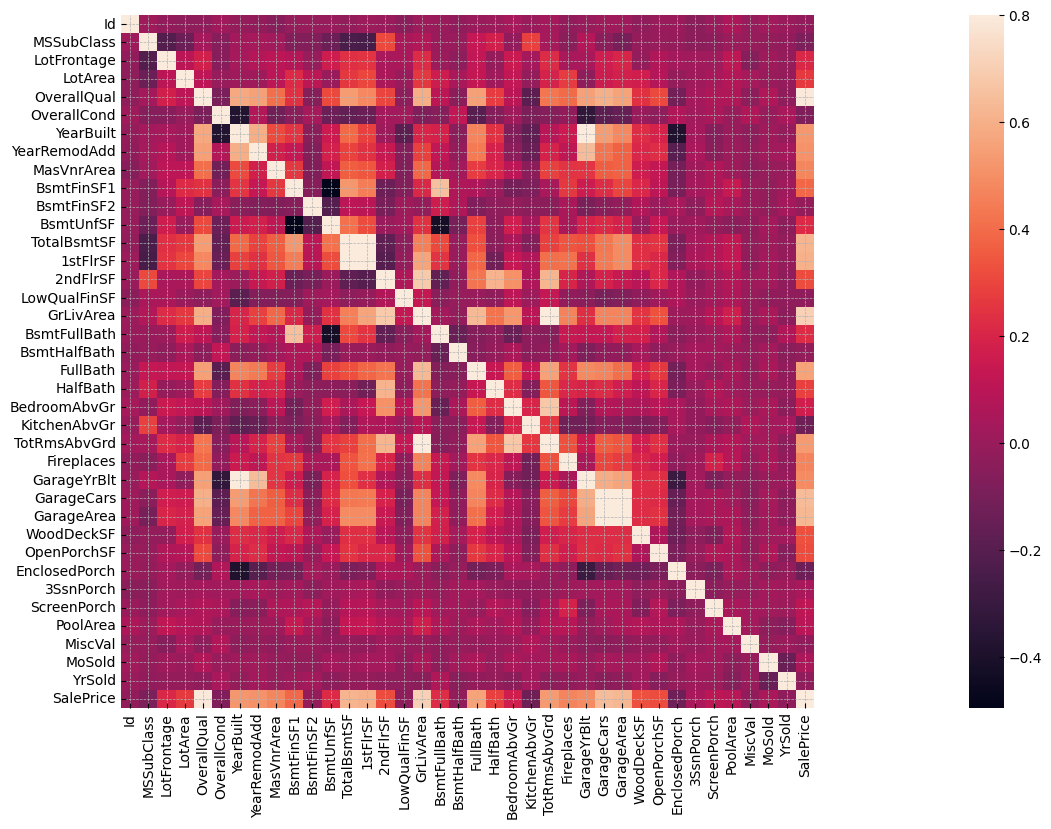

In [ ]:
#Рассчитываем матрицу корреляций
corrmat = df.corr()
f, ax = plt.subplots(figsize=(40, 9))
# Визуализируем график
sns.heatmap(corrmat, vmax=.8, square=True);

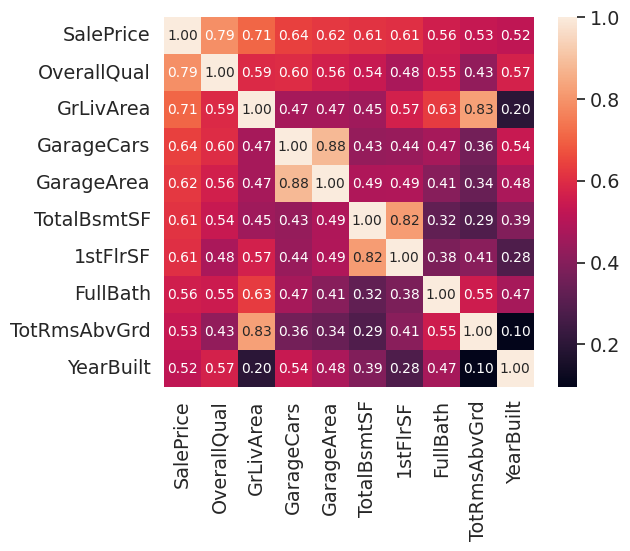

In [ ]:
#SalePrice матрица корреляций
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Пустые значения

In [ ]:
#Давайте посмотрим какой процент данных в столбцах составляют пустые значения
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Первые 20 столбцов
missing_data.head(20)

,Total,Percent
GarageYrBlt,81,0.055479
Electrical,1,0.000685
CentralAir,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000


In [ ]:
for col in df.columns:
  if df.dtypes[col] == 'int64':
    df[col] = df[col].fillna(df[col].median())
  else:
    df[col] = df[col].fillna('Other')

# Завершаем работу с данными



*   Разделим данные на численные и категории
*   Закодируем one hot категориальные данные и заполним оставшиеся пустые значения в численных данных





In [ ]:
categorical_features = df.select_dtypes(include=["object"]).columns
numerical_features = df.select_dtypes(exclude=["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

train_num = df[numerical_features]
train_cat = df[categorical_features]
# Создание фиктивных функций для категориальных значений с помощью однократного кодирования
train_cat = pd.get_dummies(train_cat)

# Объединяем категориальные и численные значения
train = pd.concat([train_num, train_cat], axis = 1)
df['SalePrice'] = np.log1p(df['SalePrice'])
y = df['SalePrice']

# Разделяем данные на тестовые и тренировочные
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

# Тренировка и предсказание


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Функция для валидации алгоритма
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

[**XGBoost :**](https://xgboost.readthedocs.io/en/latest/)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.1, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1328 (0.0158)



[**LightGBM :**](https://lightgbm.readthedocs.io/en/latest/)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq=5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23